In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as sts

In [2]:
city_data = "C:/Users/Holme/OneDrive/Desktop/Data_Analyst/resources/city_data.csv"
ride_data = "C:/Users/Holme/OneDrive/Desktop/Data_Analyst/resources/ride_data.csv"
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [3]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
sum(city_df["type"] == "Rural")

18

In [5]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# combine two dataframes into one 
pyber_data_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
pd_df = pyber_data_df
avg_fare = pd_df["fare"].mean()
avg_fare

26.753111578947426

In [8]:
count_of_rides = pd_df["ride_id"].count()
count_of_rides

2375

In [9]:
driver_count = pd_df["driver_count"]
driver_count

0        5
1       72
2       57
3       34
4       46
        ..
2370     6
2371     2
2372     1
2373     4
2374     1
Name: driver_count, Length: 2375, dtype: int64

In [10]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [12]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [13]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

In [14]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()

In [15]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()

In [16]:
urban_fare_avg = urban_cities_df.groupby(["city"]).mean()["fare"]
#urban_fare_avg.head()

In [17]:
suburban_fare_avg = suburban_cities_df.groupby(["city"]).mean()["fare"]
#suburban_fare_avg.head()

In [18]:
rural_fare_avg = rural_cities_df.groupby(["city"]).mean()["fare"]
#rural_fare_avg.head()

In [19]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
#urban_driver_count.head()

In [20]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
#suburban_driver_count.head()

In [21]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
#rural_driver_count.head()

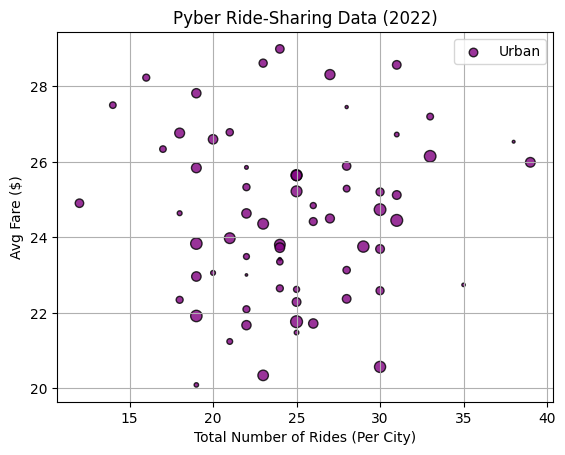

In [22]:
plt.scatter(urban_ride_count, urban_fare_avg, s=urban_driver_count, color="purple", edgecolor="black", linewidths=1, label="Urban", alpha=0.8)
plt.title("Pyber Ride-Sharing Data (2022)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

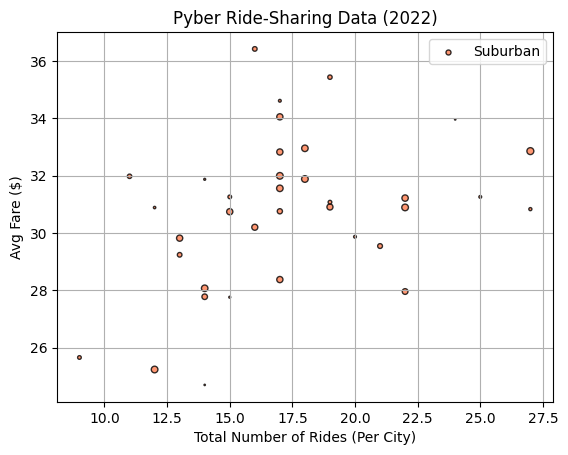

In [23]:
plt.scatter(suburban_ride_count, suburban_fare_avg, s=suburban_driver_count, color="coral", edgecolor="black", linewidths=1, label="Suburban", alpha=0.8)
plt.title("Pyber Ride-Sharing Data (2022)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

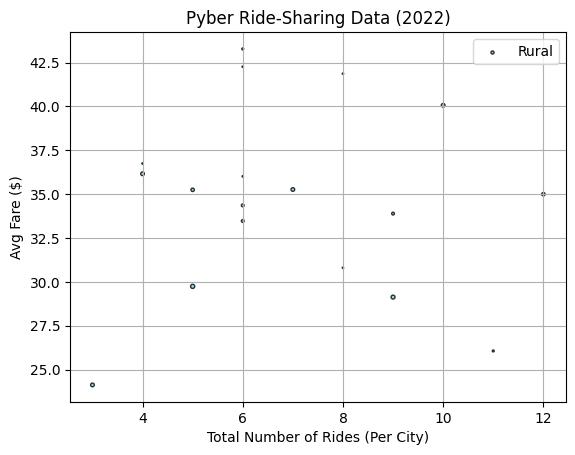

In [24]:
plt.scatter(rural_ride_count, rural_fare_avg, s=rural_driver_count, color="skyblue", edgecolor="black", linewidths=1, label="Rural", alpha=0.8)
plt.title("Pyber Ride-Sharing Data (2022)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

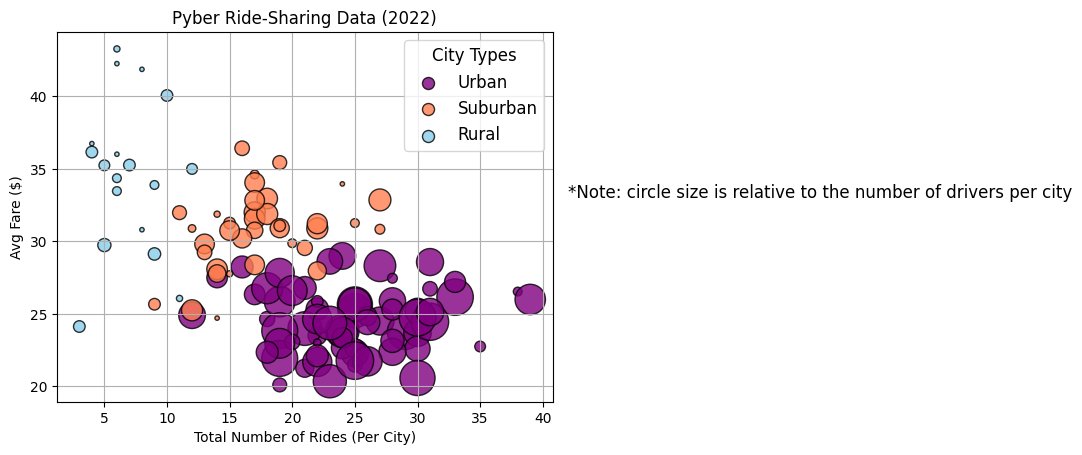

In [25]:
plt.scatter(urban_ride_count, urban_fare_avg, s=10*urban_driver_count, color="purple", edgecolor="black", linewidths=1, label="Urban", alpha=0.8)
plt.scatter(suburban_ride_count, suburban_fare_avg, s=10*suburban_driver_count, color="coral", edgecolor="black", linewidths=1, label="Suburban", alpha=0.8)
plt.scatter(rural_ride_count, rural_fare_avg, s=10*rural_driver_count, color="skyblue", edgecolor="black", linewidths=1, label="Rural", alpha=0.8)
plt.title("Pyber Ride-Sharing Data (2022)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,33, "*Note: circle size is relative to the number of drivers per city", fontsize="12")
plt.show()

In [26]:
plt.savefig("C:/Users/Holme/OneDrive/Desktop/Data_Analyst/Projects/PyBer_Analysis/fig1.png")

<Figure size 640x480 with 0 Axes>

In [27]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [57]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [56]:
suburban_fares = suburban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [58]:
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [37]:
#Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is 22.86.


In [38]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [40]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.median()

16.0

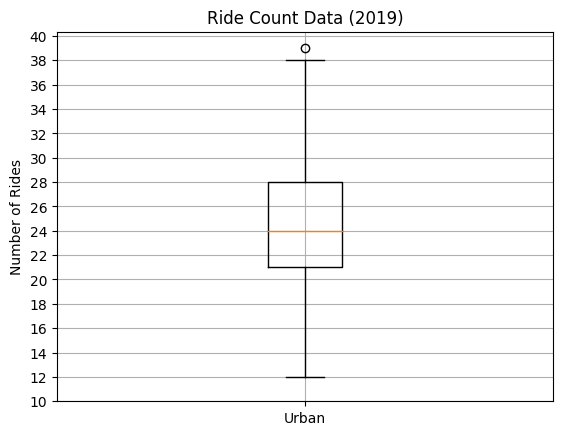

In [42]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

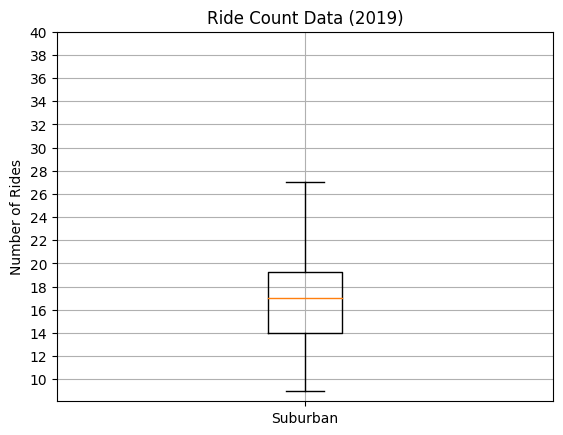

In [43]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

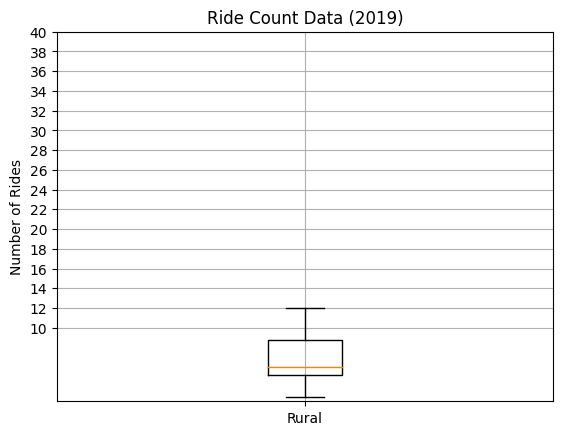

In [45]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels,)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

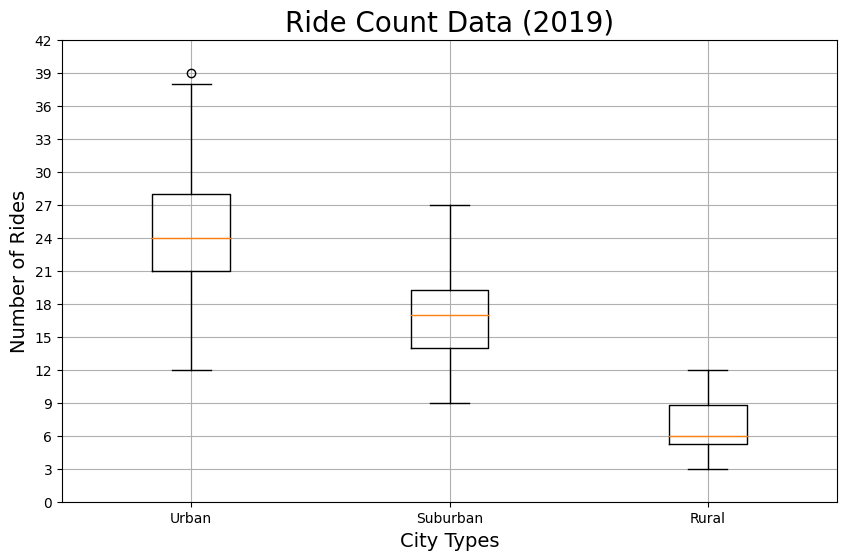

In [47]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

In [49]:
plt.savefig("C:/Users/Holme/OneDrive/Desktop/Data_Analyst/Projects/Fig2.png")

<Figure size 640x480 with 0 Axes>

In [50]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


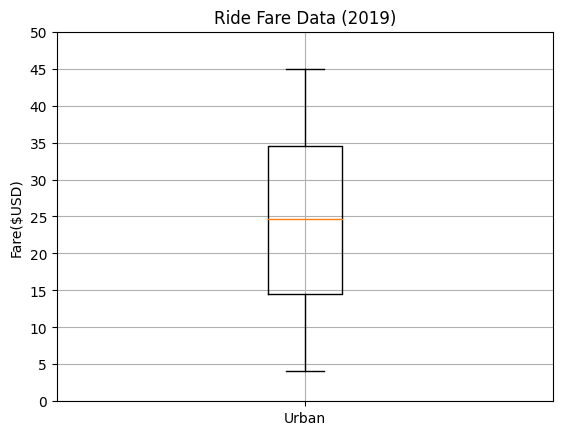

In [70]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

In [54]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

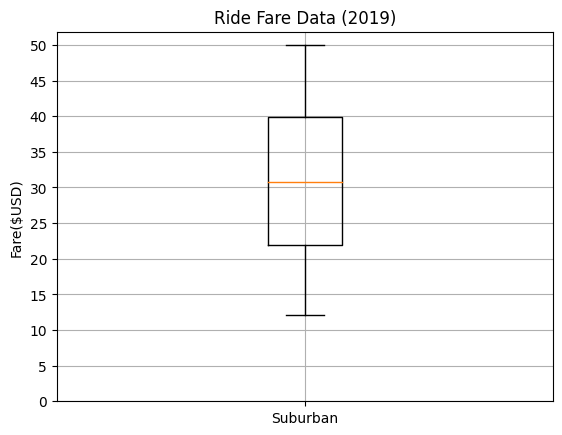

In [71]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

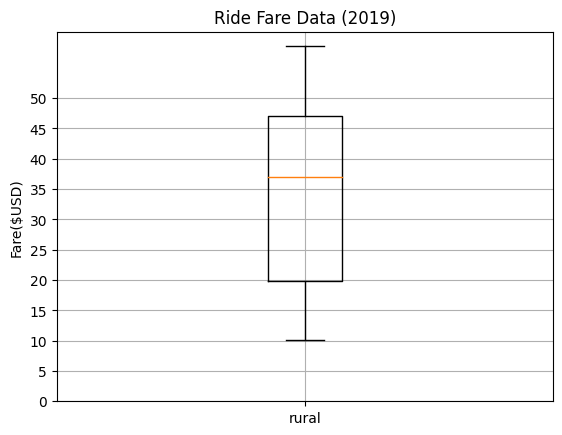

In [72]:
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

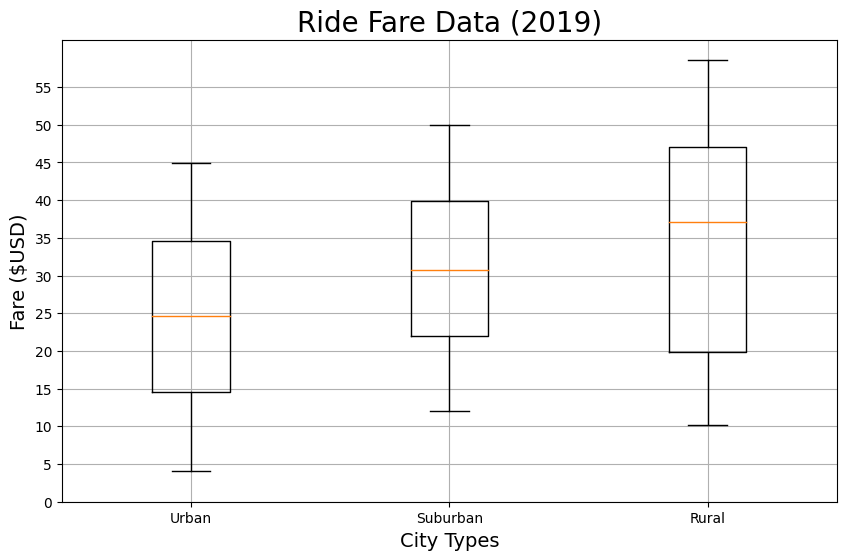

In [75]:
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("C:/Users/Holme/OneDrive/Desktop/Data_Analyst/Projects/Fig3.png")